# How Does A Country's GDP and emmissons profile relate to it's average annual temperature?

## Project 1

### Introduction

Climate change is a global phenomenon that is caused by an increase in the concentration of greenhouse gases (GHGs) in the atmosphere, primarily carbon dioxide (CO2), methane (CH4), and nitrous oxide (N2O), due to human activities such as burning fossil fuels, deforestation, and agriculture. The rise in global temperatures caused by climate change has significant impacts on ecosystems and human societies, including more frequent and severe weather events, sea level rise, and changes in precipitation patterns (Earth Science Communications Team). 

Numerous studies have demonstrated that human activities are the primary driver of global warming, and that the increase in GHG emissions is strongly linked to the rise in global temperatures (Rosa and Dietz). However, the relationship between rising emissions and GDP of countries and average annual temperatures is complex and not well understood. Some researchers suggest that economic growth and emissions are positively correlated, and that higher emissions lead to higher temperatures (Knight and Schor). For example, countries such as China, whose GDP has been growing at a rapidly over the past few decades, are also growing in GHG emissions (Christopher L. Weber a et al.). This research paper seeks to explore the relationship between rising emissions and GDP of countries on average annual temperatures, in order to provide insights into the potential impacts of economic growth on the Earth's climate system.

The dependent variable in this study is average annual temperature and the independandt variables are GDP and annual emissions (broken down into Co2, Coal Co2, Cement Co2, Oil Co2, Gas Co2, Methan and Nitrous OXide). 

Two datasets were combined to form the primary dataset in this study:  "Climate Change: Earth Surface Temperature Data" (Earth) and "Our World in Data CO2 and Greenhouse Gas Emissions database" (Ritchie et al.). The sample from the Earth Surface Temperature dataset includes several subsets, however, for the purpose of this study only the "Global Land Temperature By Country" data was used. The Earth Surface Temperature dataset includes the average monthly temperature for 243 countries from 1744-2013. The Our World in Data (OWID) sample contains data on annual Co2 (and Co2 broken down by contributions from cement, oil, gas and coal), methane and nitrous oxide emissions, as well as annual GDP by country from 1990-2018. 

Findings from the study include a weak positive correlation between Average Temperature and both GDP and Co2 emissions in countries whose Emmissions and GDP are rising rapidly.

### Data Cleaning/Loading

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import datetime
GLT_City_URL = "C:\\Users\\micha\\OneDrive\\Michael\\UofT Year 4\\ECO225 - Big Data Tools for Economists\\Project Data\\archive\\GlobalLandTemperaturesByCountry.csv"
Emmisions_URL = "C:\\Users\\micha\\OneDrive\\Michael\\UofT Year 4\\ECO225 - Big Data Tools for Economists\\Project Data\\data.csv"

In [3]:
#GLT -> Global Land Temperature dataset from Kaggle
#E -> Emmissons dataset from OWID
GLT = pd.read_csv(GLT_City_URL).drop(labels = 'AverageTemperatureUncertainty', axis = 1)
E = pd.read_csv(Emmisions_URL)

**Combing the datasets:** To combine these two data sets, several operations must be performed: 

Missing values need to be dropped, column titles names must use the same naming convention to be merged and the final dataset should contain only matching data from shared time-frames.

In [4]:
#Fixiing column names and dropping missing values
E.rename(columns = {'country':'Country', 'year':'Year'}, inplace = True)
GLT.rename(columns = {'dt':'Year'}, inplace = True)
GLT = GLT.dropna() 
#Generalize monthly inputs by year for merging
GLT['Year'] = GLT['Year'].str[0:4].astype(int)

In [5]:
#Merging data
data = E.merge(GLT, on=['Country','Year'])
index_names = data[data['Country'] == 'United Arab Emirates'].index
data.drop(index_names, inplace = True)

In [6]:
data_annual = data.drop(labels = 'AverageTemperature', axis = 1).drop_duplicates()
#cy -> country year
cy = data_annual[['Country','Year']]
def average(lst):
    return sum(lst)/len(lst)
#dcy -> Data, Country, Years
dcy = data.groupby(['Country','Year'])
#cyt -> country year temperature
avg = []
for country in cy['Country'].unique():
    for year in cy['Year'].unique():
        avg.append(average(dcy.get_group((country, year))['AverageTemperature']))
data_annual['Avg_Annual_Temp'] = avg

### Summary Statistics Tables

In [7]:
sum_stats = data_annual.drop(labels = 'Year', axis = 1).describe()
sum_stats

,gdp,cement_co2,co2,coal_co2,gas_co2,methane,nitrous_oxide,oil_co2,Avg_Annual_Temp
count,3.600000e+03,3510.000000,3600.000000,3599.000000,3599.00000,3600.000000,3600.000000,3599.000000,3600.000000
mean,4.329168e+11,5.828972,174.307535,70.052890,32.51188,46.027850,16.523408,62.548410,18.661510
std,1.401533e+12,34.462331,686.165587,397.784658,120.09953,117.744049,44.425038,217.379003,8.707836
min,2.757300e+08,0.000000,0.000000,0.000000,0.00000,0.040000,0.000000,0.059000,-19.000417
25%,1.638855e+10,0.113000,2.837750,0.000000,0.00000,4.177500,1.440000,1.889000,11.235104
50%,5.156510e+10,0.618000,17.193000,0.451000,1.71400,11.215000,4.715000,8.849000,21.666500
75%,2.631512e+11,2.766500,76.755000,14.101000,18.23750,35.542500,13.635000,36.433000,26.134833
max,1.610840e+13,748.323000,9956.309000,7493.454000,1410.36700,1147.210000,522.800000,2644.237000,30.744750


#### **Explanation:** Interpreting Summary Statistics

**Average Annual Temperature - Dependent Variable:** From this table we can observe the total range of average annual temperatures taken in every country in the dataset from 1990-2013. The lowest annual temperature in the dataset is -19 degrees Celsius and the highest is 30.7 degrees Celsius. The mean is 18.66 degrees Celsius. This particular snapshot of the data doesn't tell us too much as countries in Northern Europe are expected to have drastically different average temperatures from countries in Central Africa for example. Furthermore, without the time trend, we cannot study how temperatures changed, whether they increased or decreased, and by how much. To observe relevant relationships, we must perform a study on a per country basis.

**GDP - Independent Variable:** The summary statistics for GDP gives us a bit more information than Average Temperature. This is because we can observe the range of economic output of countries in our dataset in Real USD in 2011 dollars (see documentation for OWID dataset). The lowest recorded annual GDP is ~276 Million and the highest recorded GDP is ~16.1 Trillion. The mean level of GDP ~429 Million but standard deviation is ~1.4 Trillion so there is a high degree of variance in the sample.

**Emissions - Independent Variable:** For all emissions in the sample data, the lowest recorded emission per country per year is approx 0, meaning that some countries in the sample emitted no greenhouse gasses in any form in a given year. The mean for each demonstrates the average annual emission of countries in this dataset between 1990-2013 in Tons. We can observe from this table that Co2 takes the majority share of greenhouse gas emissions, and, amongst C02 emissions, coal is the highest contributor.

### Figures and Graphs

Of the set of 243 countries in the dataset, a subset of 6 representative countries were chosen for the figures below to make graphical interpretations more clear to the reader. The 6 countries cover a representative from North America, South America, Europe, Asia, South Asia and the Middle East and have a wise range of GDP and Emissions data.

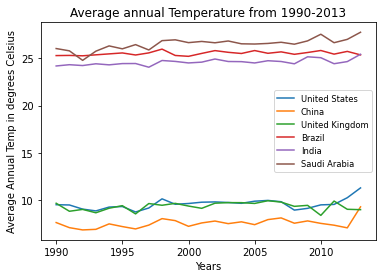

In [163]:
#Countries
C = ['United States', 'China', 'United Kingdom', 'Brazil', 'India', 'Saudi Arabia']
for country in C:
    plt.plot(cy['Year'].unique(),data_annual[data_annual['Country'] == country]['Avg_Annual_Temp'], label = country)
# set axis lables
plt.xlabel("Years")
plt.ylabel("Average Annual Temp in degrees Celsius")
# set chart title
plt.title("Average annual Temperature from 1990-2013")
plt.legend(loc = 'best', fontsize = 'small')
plt.show()

The figure above shows how average annual temperatures in 6 representative countries change over time. In this small timeframe, it's hard to observe a noticeable change. This being said, in the United States and China specifically, average annual temperatures have increased more rapidly than other countries in the last few years of data.

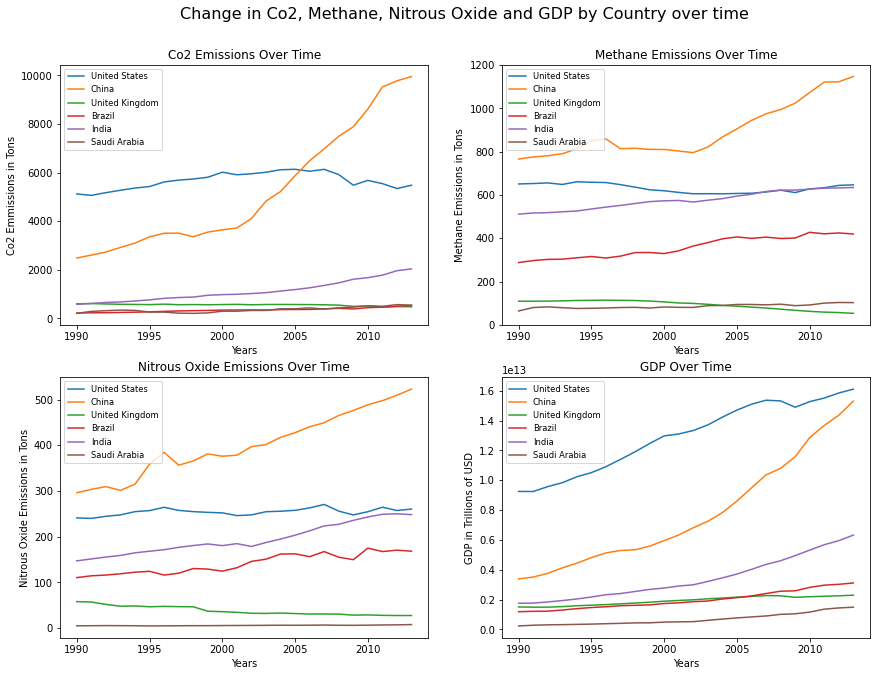

In [171]:
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(2, 2)
figure.suptitle("Change in Co2, Methane, Nitrous Oxide and GDP by Country over time",
                fontsize=16, x = '1.06', y = '2.2') 
# For Co2
for country in C:
    axis[0, 0].plot(cy['Year'].unique(),data_annual[data_annual['Country'] == country]['co2'], label = country)
# For Methane
for country in C:
    axis[0, 1].plot(cy['Year'].unique(),data_annual[data_annual['Country'] == country]['methane'], label = country) 
# For Nitrous Oxide
for country in C:
    axis[1, 0].plot(cy['Year'].unique(),data_annual[data_annual['Country'] == country]['nitrous_oxide'], label = country)
# For GDP
for country in C:
    axis[1, 1].plot(cy['Year'].unique(),data_annual[data_annual['Country'] == country]['gdp'], label = country)
axis[0, 0].set_title('Co2 Emissions Over Time')
axis[0, 1].set_title('Methane Emissions Over Time')
axis[1, 0].set_title('Nitrous Oxide Emissions Over Time')
axis[1, 1].set_title('GDP Over Time')
axis[0, 0].legend(loc = 'best', fontsize = 'small')
axis[0, 1].legend(loc = 'best', fontsize = 'small')
axis[1, 0].legend(loc = 'best', fontsize = 'small')
axis[1, 1].legend(loc = 'best', fontsize = 'small')
axis[0, 0].set_xlabel('Years')
axis[0, 1].set_xlabel('Years')
axis[1, 0].set_xlabel('Years')
axis[1, 1].set_xlabel('Years')
axis[0, 0].set_ylabel('Co2 Emmissions in Tons')
axis[0, 1].set_ylabel('Methane Emissions in Tons')
axis[1, 0].set_ylabel('Nitrous Oxide Emissions in Tons')
axis[1, 1].set_ylabel('GDP in Trillions of USD')
plt.subplots_adjust(bottom=0.01, right=2, top=2)
plt.show()

These graphs show how Emissions and GDP change for each of the representative countries over the 23 years included in this dataset. Noteably, China has had the most explosive growth for both emissions and GDP while the United States has managed to slightly decrease Co2 and Methane emissions while also growing in GDP. India has the second highest emissions growth and also the second fastest growing GDP.

From these data, it's possible to infer that countries whose GDP grows quickly also have higher emissions due to rising industrialization. The United States may be an excpetion because most of the growth occuring in the United States is derived from information economies (Jorgenson, Dale W., et al.) rather than production economies like in China and India. 

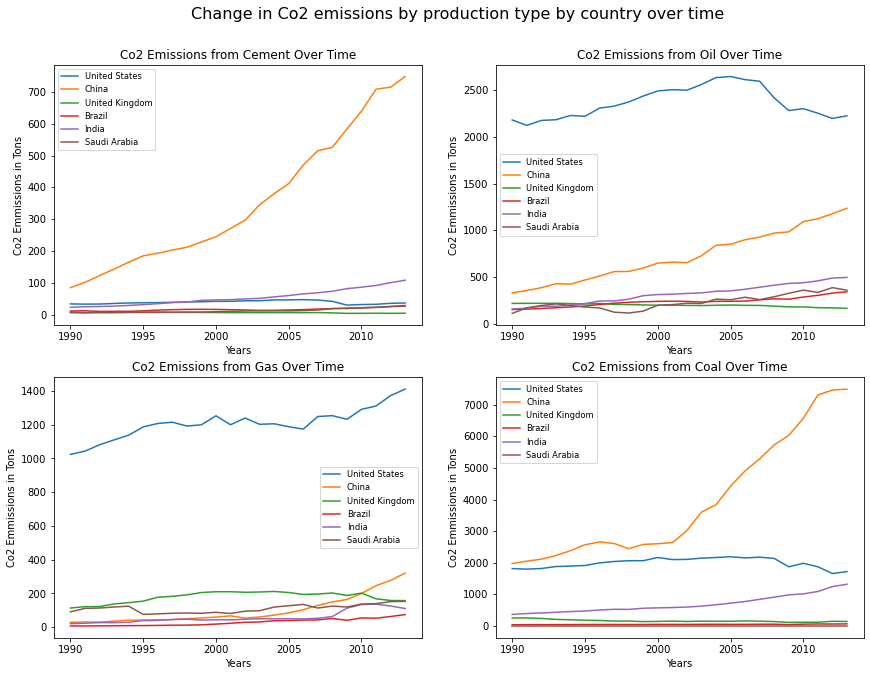

In [167]:
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(2, 2)
figure.suptitle("Change in Co2 emissions by production type by country over time",
                fontsize=16, x = '1.06', y = '2.2') 
# For Co2
for country in C:
    axis[0, 0].plot(cy['Year'].unique(),data_annual[data_annual['Country'] == country]['cement_co2'], label = country)
# For Methane
for country in C:
    axis[0, 1].plot(cy['Year'].unique(),data_annual[data_annual['Country'] == country]['oil_co2'], label = country) 
# For Nitrous Oxide
for country in C:
    axis[1, 0].plot(cy['Year'].unique(),data_annual[data_annual['Country'] == country]['gas_co2'], label = country)
# For GDP
for country in C:
    axis[1, 1].plot(cy['Year'].unique(),data_annual[data_annual['Country'] == country]['coal_co2'], label = country)
axis[0, 0].set_title('Co2 Emissions from Cement Over Time')
axis[0, 1].set_title('Co2 Emissions from Oil Over Time')
axis[1, 0].set_title('Co2 Emissions from Gas Over Time')
axis[1, 1].set_title('Co2 Emissions from Coal Over Time')
axis[0, 0].legend(loc = 'best', fontsize = 'small')
axis[0, 1].legend(loc = 'best', fontsize = 'small')
axis[1, 0].legend(loc = 'best', fontsize = 'small')
axis[1, 1].legend(loc = 'best', fontsize = 'small')
axis[0, 0].set_xlabel('Years')
axis[0, 1].set_xlabel('Years')
axis[1, 0].set_xlabel('Years')
axis[1, 1].set_xlabel('Years')
axis[0, 0].set_ylabel('Co2 Emmissions in Tons')
axis[0, 1].set_ylabel('Co2 Emmissions in Tons')
axis[1, 0].set_ylabel('Co2 Emmissions in Tons')
axis[1, 1].set_ylabel('Co2 Emmissions in Tons')
plt.subplots_adjust(bottom=0.01, right=2, top=2)
plt.show()

These graphs show how different countries use the subsets of overall Co2 emitting resources differently over time. By observing the Y axis, it's possible to gauge which resource contributes most heavily to overall Co2 emissions. For Example, Coal contributes to Co2 Emissions on the scale of thousands of tons of Co2, while Cement contributes to Co2 Emissions on the scale of only hundreds of tons of Co2. 

China, whose Co2 emissions grew the most of these 6 countries, is emitting substantially more Co2 from Cement and Coal than other countries, but relatively little emissions derived from oil and gas. This makes sense as the increased industrialization and demand for production relate to the usage of coal and cement, but not necisarrily to oil and gas because of the need to build new factories adn infrastructure. Conversly, the United states emittes Co2 primarily from oil and gas and relativly little from cement and Coal. The higher contribution of Coal to overall Co2 emissions relative to other resources explains why countries such as China and India are more rapidly increasing overall Co2 emissions than the United States.

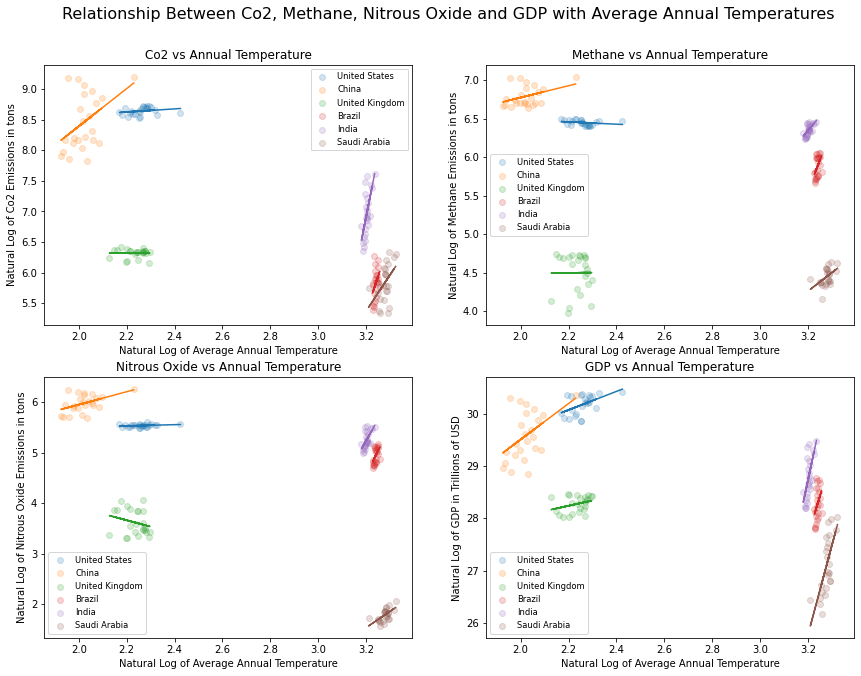

In [169]:
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(2, 2)
figure.suptitle("Relationship Between Co2, Methane, Nitrous Oxide and GDP with Average Annual Temperatures",
                fontsize=16, x = '1.06', y = '2.2') 
# For Co2
for country in C:
    x = np.log(data_annual[data_annual['Country'] == country]['Avg_Annual_Temp'])
    y = np.log(data_annual[data_annual['Country'] == country]['co2'])
    axis[0, 0].scatter(x,y, label = country, alpha = 0.2)
    m, b = np.polyfit(x, y, 1)
    axis[0, 0].plot(x, m*x+b)
# For Methane
for country in C:
    x = np.log(data_annual[data_annual['Country'] == country]['Avg_Annual_Temp'])
    y = np.log(data_annual[data_annual['Country'] == country]['methane'])
    axis[0, 1].scatter(x, y, label = country, alpha = 0.2) 
    m, b = np.polyfit(x, y, 1)
    axis[0, 1].plot(x, m*x+b)
# For Nitrous Oxide
for country in C:
    x = np.log(data_annual[data_annual['Country'] == country]['Avg_Annual_Temp'])
    y = np.log(data_annual[data_annual['Country'] == country]['nitrous_oxide'])
    axis[1, 0].scatter(x, y, label = country, alpha = 0.2)
    m, b = np.polyfit(x, y, 1)
    axis[1, 0].plot(x, m*x+b)
# For GDP
for country in C:
    x = np.log(data_annual[data_annual['Country'] == country]['Avg_Annual_Temp'])
    y = np.log(data_annual[data_annual['Country'] == country]['gdp'])
    axis[1, 1].scatter(x, y, label = country, alpha = 0.2)
    m, b = np.polyfit(x, y, 1)
    axis[1, 1].plot(x, m*x+b)
    
axis[0, 0].set_title('Co2 vs Annual Temperature')
axis[0, 1].set_title('Methane vs Annual Temperature')
axis[1, 0].set_title('Nitrous Oxide vs Annual Temperature')
axis[1, 1].set_title('GDP vs Annual Temperature')
axis[0, 0].legend(loc = 'best', fontsize = 'small')
axis[0, 1].legend(loc = 'best', fontsize = 'small')
axis[1, 0].legend(loc = 'best', fontsize = 'small')
axis[1, 1].legend(loc = 'best', fontsize = 'small')
axis[0, 0].set_xlabel('Natural Log of Average Annual Temperature')
axis[0, 1].set_xlabel('Natural Log of Average Annual Temperature')
axis[1, 0].set_xlabel('Natural Log of Average Annual Temperature')
axis[1, 1].set_xlabel('Natural Log of Average Annual Temperature')
axis[0, 0].set_ylabel('Natural Log of Co2 Emissions in tons')
axis[0, 1].set_ylabel('Natural Log of Methane Emissions in tons')
axis[1, 0].set_ylabel('Natural Log of Nitrous Oxide Emissions in tons')
axis[1, 1].set_ylabel('Natural Log of GDP in Trillions of USD')
plt.subplots_adjust(bottom=0.01, right=2, top=2)
plt.show()

These scatterplots and related regressions lines show how each of the percentage change in the main dependent variables in this study contribute to the percentage change in average annual temperatures. It's important to note that different countries have wildly different regression lines, so a general interpretation for all countries is not possible to derive from these data.

Some noteable obervations include the weak posative correlation between Co2 and GDP with annual temperature for the United States and China. These two countries had the highest overall emissions and GDP respectivly, so it's possible to infer that higher overall Co2 emissions and GDP generate more explanatory relationships between the percentage change in the Co2 emissions and GDP with average annual temperatures. 

For all the countries in these graphs, Nitrous Oxide and Methane seem to have less explantory relationships with average annual temeprature than the Co2 and GDP variables.

## Project 2

### The Message

### Maps and Interpretations

### Conclusion

## Biliography

Christopher L. Weber a, et al. “The Contribution of Chinese Exports to Climate Change.” Energy Policy, Elsevier, 21 July 2008, https://www.sciencedirect.com/science/article/pii/S0301421508002905. 

Earth Science Communications Team at  NASA's Jet Propulsion Laboratory. “The Causes of Climate Change.” NASA, NASA, 21 Feb. 2023, https://climate.nasa.gov/causes/. 

Earth, Berkeley. “Climate Change: Earth Surface Temperature Data.” Kaggle, 1 May 2017, https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data. 

Ritchie, Hannah, et al. “CO2 Emissions.” Our World in Data, 11 May 2020, https://ourworldindata.org/co2-emissions. 

Rosa, Eugene A., and Thomas Dietz. “Human Drivers of National Greenhouse-Gas Emissions.” Nature News, Nature Publishing Group, 10 June 2012, https://www.nature.com/articles/nclimate1506. 

Knight, Kyle W., and Juliet B. Schor. “Economic Growth and Climate Change: A Cross-National Analysis of Territorial and Consumption-Based Carbon Emissions in High-Income Countries.” MDPI, Multidisciplinary Digital Publishing Institute, 10 June 2014, https://www.mdpi.com/2071-1050/6/6/3722. 

Jorgenson, Dale W., et al. “Raising the Speed Limit: U.S. Economic Growth in the Information Age.” Brookings Papers on Economic Activity, vol. 2000, no. 1, 2000, pp. 125–235. JSTOR, http://www.jstor.org/stable/2667350. Accessed 25 Feb. 2023.